# Evaluating Multiple Models

How do we know which model to use?

1. Size of the dataset
- fewer features = simpler model, faster training time
- some models require large amounts of data to perform well

2. Interpretability
- some models are easier to explain. This may be important to stakeholders
- linear regression for instance we can easily understand the coefficients

3. Flexibility
- flexibility might be important to get the most accurate predictions. Generally, flexible models make fewer assumptions about the data; for example, a KNN model does not assume a linear relationship between the features and the target.

### Comparison metrics

1. Regression model performance 
- RMSE
- R-Squared

2. Classification model performance
- Accuracy
- Confusion matrix
- Precision, recall, f1-score
- ROC AUC

 one approach is to select several models and a metric, then evaluate their performance without any form of hyperparameter tuning. Recall that the performance of some models, such as KNN, linear regression, and logistic regression, are affected by scaling our data. Therefore, it is generally best to scale our data before evaluating models out of the box.


We will evaluate three models for binary classification of song genre: 
1. KNN, 
2. Logistic Regression
3. Decision Tree Classifier. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, KFold, train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, Lasso, Ridge, LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

pd.set_option('display.max_columns', None)

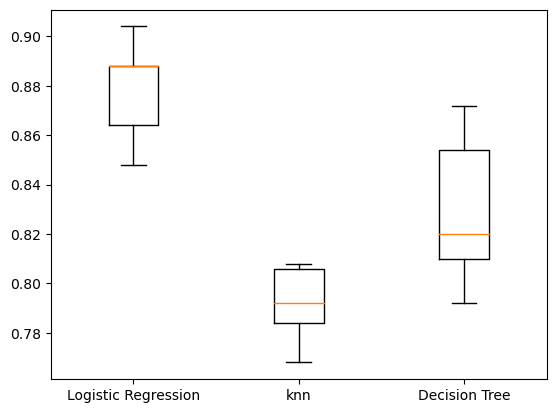

In [2]:
music = pd.read_csv('Data/music_clean.csv')
music = music.drop('Unnamed: 0', axis=1)

X= music.drop('genre', axis=1).values
y = music['genre'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

models = {'Logistic Regression':LogisticRegression(),
          'knn':KNeighborsClassifier(),
          'Decision Tree':DecisionTreeClassifier()}

results = []

for model in models.values():
    kf = KFold(n_splits=6, random_state=42, shuffle=True)
    cv_results = cross_val_score(model, X_train_scaled, y_train, cv=kf)
    results.append(cv_results)

plt.boxplot(results, labels = models.keys())
plt.show()

The output shows us the range of cross-validation accuracy scores. We can also see each model's median cross-validation score, represented by the orange line in each box. We can see logistic regression has the best median score.

Test set performance

To evaluate on the test set we loop through the names and values of the dictionary using the dot-items method. Inside the loop we fit the model, calculate accuracy, and print it. Logistic regression performs best for this problem if we are using accuracy as the metric.

In [3]:
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    test_score = model.score(X_test_scaled, y_test)
    print(f'Test set Accuracy: {name} : {test_score}')

Test set Accuracy: Logistic Regression : 0.82
Test set Accuracy: knn : 0.784
Test set Accuracy: Decision Tree : 0.772


## Visualizing Regression model performance

Build three regression models to predict a song's "energy" levels.

In [4]:
music = pd.read_csv('Data/music_original.csv')
music = music.drop('Unnamed: 0', axis=1)
music.head()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,genre
0,60,0.896000,0.726,214547,0.177,0.000002,0.1160,-14.824,0.0353,92.934,0.618,Jazz
1,63,0.003840,0.635,190448,0.908,0.083400,0.2390,-4.795,0.0563,110.012,0.637,Rap
2,59,0.000075,0.352,456320,0.956,0.020300,0.1250,-3.634,0.1490,122.897,0.228,Electronic
3,54,0.945000,0.488,352280,0.326,0.015700,0.1190,-12.020,0.0328,106.063,0.323,Rock
4,55,0.245000,0.667,273693,0.647,0.000297,0.0633,-7.787,0.0487,143.995,0.300,Rap


In [5]:
music_dummies = pd.get_dummies(music['genre'], drop_first=True)

music = pd.concat([music, music_dummies], axis=1)
music = music.drop('genre', axis=1)
music.head()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,Anime,Blues,Classical,Country,Electronic,Hip-Hop,Jazz,Rap,Rock,Jazz
0,60,0.896000,0.726,214547,0.177,0.000002,0.1160,-14.824,0.0353,92.934,0.618,0,0,0,0,0,0,0,0,0,1
1,63,0.003840,0.635,190448,0.908,0.083400,0.2390,-4.795,0.0563,110.012,0.637,0,0,0,0,0,0,0,1,0,0
2,59,0.000075,0.352,456320,0.956,0.020300,0.1250,-3.634,0.1490,122.897,0.228,0,0,0,0,1,0,0,0,0,0
3,54,0.945000,0.488,352280,0.326,0.015700,0.1190,-12.020,0.0328,106.063,0.323,0,0,0,0,0,0,0,0,1,0
4,55,0.245000,0.667,273693,0.647,0.000297,0.0633,-7.787,0.0487,143.995,0.300,0,0,0,0,0,0,0,1,0,0


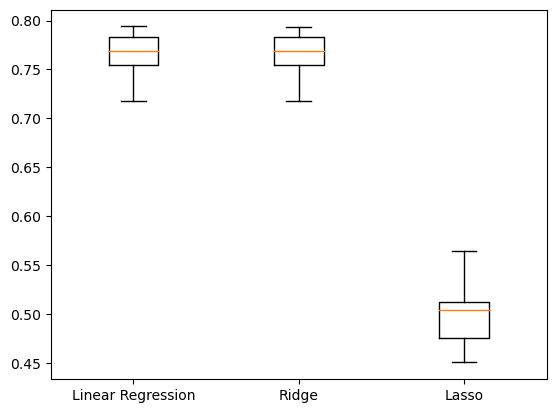

In [6]:
X = music.drop('energy', axis=1).values
y = music['energy'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

models = {"Linear Regression": LinearRegression(), 
          "Ridge": Ridge(alpha=0.1), 
          "Lasso": Lasso(alpha=0.1)}

results = []

for model in models.values():
  kf = KFold(n_splits=6, random_state=42, shuffle=True)
  cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=kf)
  results.append(cv_scores)

plt.boxplot(results, labels=models.keys())
plt.show() 

Lasso regression is not a good model for this problem, while linear regression and ridge perform fairly equally. Let's make predictions on the test set, and see if the RMSE can guide us on model selection.

In [7]:
for name, model in models.items():
  model.fit(X_train_scaled, y_train)
  y_pred = model.predict(X_test_scaled)
  test_rmse = mean_squared_error(y_test, y_pred, squared=False)
  print("{} Test Set RMSE: {}".format(name, test_rmse))

Linear Regression Test Set RMSE: 0.1123445317021839
Ridge Test Set RMSE: 0.11234656511457147
Lasso Test Set RMSE: 0.1728777915334469


The Ridge regression model just edges the best performance compared to Linear Regression, although the difference is a RMSE of 0.00002 for popularity! Now let's look at classification model selection.

## Visualizing classification model performance

The "popularity" column in the music_df dataset has been converted to binary values, with 1 representing popularity more than or equal to the median for the "popularity" column, and 0 indicating popularity below the median.

Build and visualize the results of three different models to classify whether a song is popular or not.

In [8]:
music = pd.read_csv('Data/music_clean.csv')
music = music.drop('Unnamed: 0', axis=1)
music.head()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,genre
0,60.0,0.896000,0.726,214547.0,0.177,0.000002,0.1160,-14.824,0.0353,92.934,0.618,1
1,63.0,0.003840,0.635,190448.0,0.908,0.083400,0.2390,-4.795,0.0563,110.012,0.637,1
2,59.0,0.000075,0.352,456320.0,0.956,0.020300,0.1250,-3.634,0.1490,122.897,0.228,1
3,54.0,0.945000,0.488,352280.0,0.326,0.015700,0.1190,-12.020,0.0328,106.063,0.323,1
4,55.0,0.245000,0.667,273693.0,0.647,0.000297,0.0633,-7.787,0.0487,143.995,0.300,1


In [9]:
popularity_median = music['popularity'].median()
music['popularity'] = np.where(music['popularity'] >= popularity_median, 1, 0)
music.head()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,genre
0,1,0.896000,0.726,214547.0,0.177,0.000002,0.1160,-14.824,0.0353,92.934,0.618,1
1,1,0.003840,0.635,190448.0,0.908,0.083400,0.2390,-4.795,0.0563,110.012,0.637,1
2,1,0.000075,0.352,456320.0,0.956,0.020300,0.1250,-3.634,0.1490,122.897,0.228,1
3,1,0.945000,0.488,352280.0,0.326,0.015700,0.1190,-12.020,0.0328,106.063,0.323,1
4,1,0.245000,0.667,273693.0,0.647,0.000297,0.0633,-7.787,0.0487,143.995,0.300,1


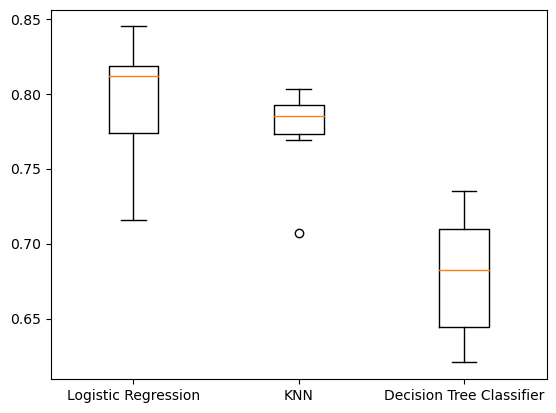

In [10]:
X = music.drop('popularity', axis=1).values
y = music['popularity'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

models = {'Logistic Regression': LogisticRegression(), 
          'KNN': KNeighborsClassifier(), 
          'Decision Tree Classifier': DecisionTreeClassifier()}

results = []

for model in models.values():  
  # Instantiate a KFold object
  kf = KFold(n_splits=6, random_state=12, shuffle=True)  
  # Perform cross-validation
  cv_results = cross_val_score(model, X_train_scaled, y_train, cv=kf)
  results.append(cv_results)
plt.boxplot(results, labels=models.keys())
plt.show()

logistic regression is the best candidate based on the cross-validation results!

### Pipeline for predicting song popularity

1. Build a pipeline to impute missing values.
2. scale features.
3. perform hyperparameter tuning of a logistic regression model. 

The aim is to find the best parameters and accuracy when predicting song genre!

In [11]:
music = pd.read_csv('Data/music_clean.csv')

In [12]:
music.head()

,Unnamed: 0,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,genre
0,36506,60.0,0.896000,0.726,214547.0,0.177,0.000002,0.1160,-14.824,0.0353,92.934,0.618,1
1,37591,63.0,0.003840,0.635,190448.0,0.908,0.083400,0.2390,-4.795,0.0563,110.012,0.637,1
2,37658,59.0,0.000075,0.352,456320.0,0.956,0.020300,0.1250,-3.634,0.1490,122.897,0.228,1
3,36060,54.0,0.945000,0.488,352280.0,0.326,0.015700,0.1190,-12.020,0.0328,106.063,0.323,1
4,35710,55.0,0.245000,0.667,273693.0,0.647,0.000297,0.0633,-7.787,0.0487,143.995,0.300,1


In [13]:
X = music.drop('genre', axis=1).values
y = music['genre'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

steps = [("imp_mean", SimpleImputer()), 
         ("scaler", StandardScaler()), 
         ("logreg", LogisticRegression())]

pipeline = Pipeline(steps)
params = {"logreg__solver": ["newton-cg", "saga", "lbfgs"],
         "logreg__C": np.linspace(0.001, 1.0, 10)}

tuning = GridSearchCV(pipeline, param_grid=params)
tuning.fit(X_train, y_train)
y_pred = tuning.predict(X_test)

# Compute and print performance
print("Tuned Logistic Regression Parameters: {}, Accuracy: {}".format(tuning.best_params_, tuning.score(X_test, y_test)))

Tuned Logistic Regression Parameters: {'logreg__C': 1.0, 'logreg__solver': 'newton-cg'}, Accuracy: 0.89
